<img src="http://www.cems.uwe.ac.uk/~pa-legg/images/uwe_banner.png">

# UFCFEL-15-3 Security Data Analytics and Visualisation
# Portfolio Assignment 3: Large-Scale Data Exploration for Insider Threat Detection  (2022)
---

The completion of this worksheet is worth a **maximum of 45 marks** towards your portfolio assignment for the UFCFEL-15-3 Security Data Analytics and Visualisation (SDAV) module.

### Brief
---

In this task, you have been asked to investigate a potential security threat within an organisation. Building on your previous worksheet expertise, you will need to apply your skills and knowledge of data analytics and visualisation to examine and explore the datasets methodically to uncover which employee is acting as a threat and why. The company have provided you with activity logs for various user interactions for the past 6 months, resulting in a lot of data that they need your expertise for to decipher. They want to have a report that details the investigation that you have carried out, details of the suspected individual, and a clear rationale as to why this suspect is flagged. You will need to document your investigation, giving clear justification for your process using Markdown annotation within your notebook. You will need to provide a clear rationale for why you suspect a given individual to be acting as a threat, based on the pattern of activity that you identify.

<i>This coursework is specifically designed to challenge your critical thinking and creativity, and is designed as an open problem. Examine the data and try to think how an individual user may appear as an anomaly against the remainder of the data. This could be an anomaly compared to a group of users, or an anomaly as compared over time.</i>

### Assessment and Marking
---

Marks will be allocated within the following criteria:

* **Identification and justification of the suspicious behaviour (15)**
* **Analytical process and reasoning to deduce the suspicious behaviour (15)**
* **Use of informative visualisation and data exploration techniques (10)**
* **Clarity and professional presentation (5)**

To achieve the higher end of the grade scale, you need to demonstrate creativity in how you approach the problem of identifying malicious behaviours, and ensure that you have accounted for multiple anomalies across the set of data available.

### Contact
---

Questions about this assignment should be directed to your module leader (Phil.Legg@uwe.ac.uk). You can use the Blackboard Q&A feature to ask questions related to this module and this assignment, as well as the on-site teaching sessions.

---


## Load in the data

In [1]:
import random
import string
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import datetime
import networkx as nx

dataset_list = ['onlinebargains']
DATASET = dataset_list[0]

def load_data(DATASET):
    if DATASET in dataset_list:
        email_data = pd.read_csv('./T3_data/' + DATASET + '/email_data.csv', parse_dates=True, index_col=0)
        file_data = pd.read_csv('./T3_data/' + DATASET + '/file_data.csv', parse_dates=True, index_col=0)
        web_data = pd.read_csv('./T3_data/' + DATASET + '/web_data.csv', parse_dates=True, index_col=0)
        login_data = pd.read_csv('./T3_data/' + DATASET + '/login_data.csv', parse_dates=True, index_col=0)
        usb_data = pd.read_csv('./T3_data/' + DATASET + '/usb_data.csv', parse_dates=True, index_col=0)
        employee_data = pd.read_csv('./T3_data/' + DATASET + '/employee_data.csv', index_col=0)
        
        email_data['datetime'] = pd.to_datetime(email_data['datetime'])
        file_data['datetime'] = pd.to_datetime(file_data['datetime'])
        web_data['datetime'] = pd.to_datetime(web_data['datetime'])
        login_data['datetime'] = pd.to_datetime(login_data['datetime'])
        usb_data['datetime'] = pd.to_datetime(usb_data['datetime'])
    else:
        print ("DATASET variable not defined")
        return
    return employee_data, login_data, usb_data, web_data, file_data, email_data

employee_data, login_data, usb_data, web_data, file_data, email_data = load_data(DATASET)
employee_data
file_data

,datetime,user,filename
0,2020-01-01 00:42:25.544227,usr-ipd,/policy
1,2020-01-01 00:50:48.627385,usr-hyo,/do_not_delete
2,2020-01-01 01:01:38.409035,usr-hyo,/newsletter
3,2020-01-01 01:14:49.310254,usr-hyo,/tech
4,2020-01-01 01:17:22.914953,usr-hyo,/newsletter
...,...,...,...
3799265,2020-11-30 23:40:54.695141,usr-lnn,/newsletter/general
3799266,2020-11-30 23:48:35.828385,usr-nic,/secret
3799267,2020-11-30 23:49:02.955959,usr-vul,/company_profile
3799268,2020-11-30 23:49:28.216624,usr-nic,/private/staffreview


# 1. Begin investigation




# Assumption

These are some assumption that I have made whilst carrying out this investigation

- I am taking any data that deviates from the norm as an anomoly. Such as a user having a higher amount of files accessed compared to their peers in the same department. As I am comparing them as departments you could assume that they all have a similar workload and would be carrying out the same tasks which would show consistant trends throughout the datasets.



## Checking and removing NAN values in the datasets


In [2]:
# Remove NAN values from the dataset
employee_data = employee_data.dropna()
login_data = login_data.dropna()
usb_data = usb_data.dropna()
web_data = web_data.dropna()
file_data = file_data.dropna()
email_data = email_data.dropna()


Creating a copy of each dataframe and also changing the time into days

In [3]:
employee_data_copy = employee_data.copy()
login_data_copy = login_data.copy()
usb_data_copy = usb_data.copy()
web_data_copy = web_data.copy()
file_data_copy = file_data.copy()
email_data_copy = email_data.copy()

login_data_copy['datetime'] = login_data_copy['datetime'].dt.date
usb_data_copy['datetime'] = usb_data_copy['datetime'].dt.date
web_data_copy['datetime'] = web_data_copy['datetime'].dt.date
file_data_copy['datetime'] = file_data_copy['datetime'].dt.date
email_data_copy['datetime'] = email_data_copy['datetime'].dt.date


# Overview of the whole year

I first want to plot all of the data throughout the year onto different axis's to try to determine if there are any similar occurences in any of the datasets
<br>
If there are any anomolies in the graphs that show a trend between them I will look into that time period in depth

<AxesSubplot:title={'center':'Files accessed per day'}, xlabel='datetime', ylabel='Number of files'>

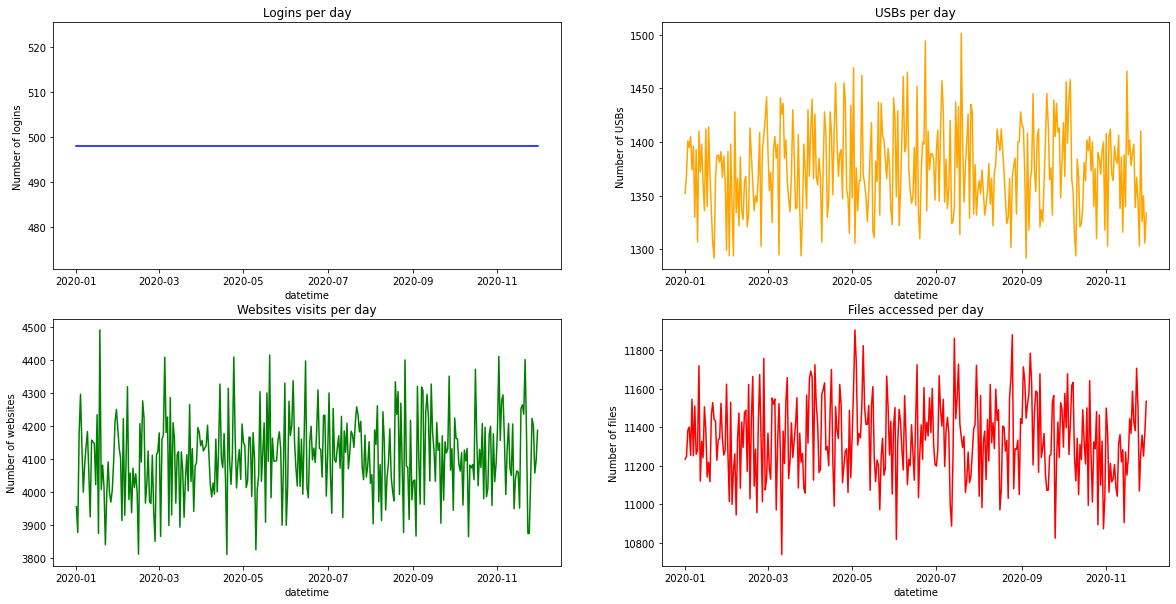

In [4]:


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 10))
ax1.title.set_text('Logins per day')
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of logins')

ax2.title.set_text('USBs per day')
ax2.set_xlabel('Date')
ax2.set_ylabel('Number of USBs')

ax3.title.set_text('Websites visits per day')
ax3.set_xlabel('Date')
ax3.set_ylabel('Number of websites')

ax4.title.set_text('Files accessed per day')
ax4.set_xlabel('Date')
ax4.set_ylabel('Number of files')

login_data_copy.groupby('datetime').count()['user'].plot(ax=ax1, color='blue')
usb_data_copy.groupby('datetime').count()['user'].plot(ax=ax2, color='orange')
web_data_copy.groupby('datetime').count()['website'].plot(ax=ax3, color='green')
file_data_copy.groupby('datetime').count()['user'].plot(ax=ax4, color='red')


After plotting the login dataset it has shown that there are always the same amount of logins and logouts collectively per day which would suggest that the workforce have a consistant timetable 

I will now plot files accessed, websites visits and usbs uses along the same axis to analyse wether there are any similarities between the graphs. I would have plotted these on the same graph and changed the alpha values but as all of the datasets are between different value ranges, so I believe three graphs may end up being clearer.

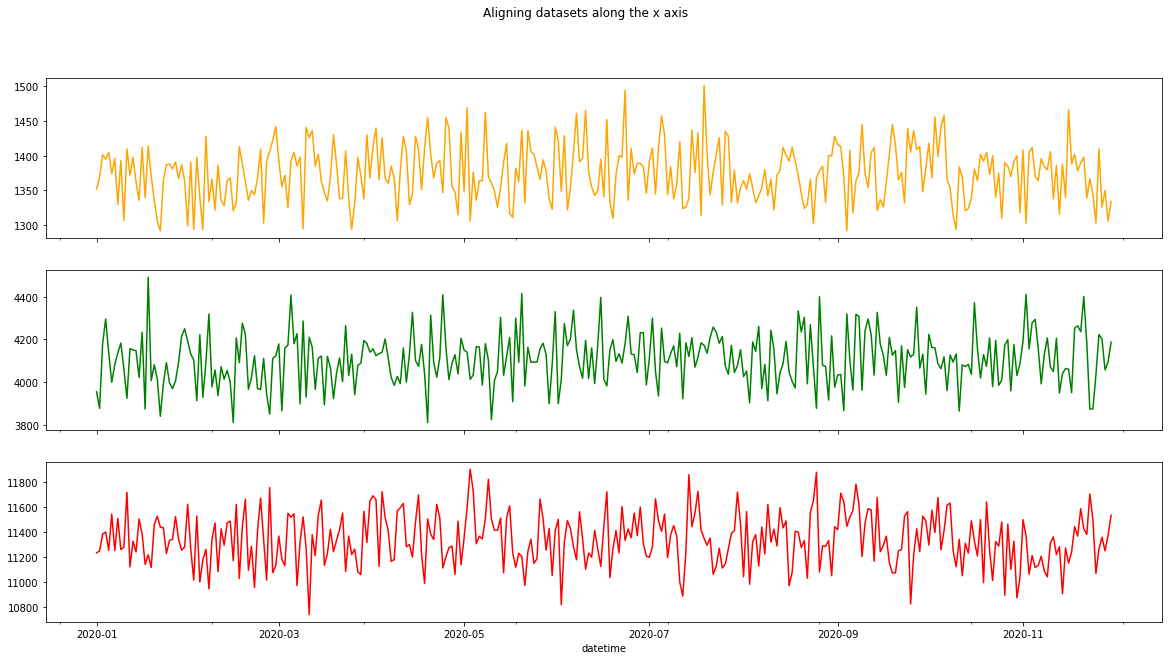

In [5]:
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, figsize=(20, 10))
fig.suptitle('Aligning datasets along the x axis')
usb_data_copy.groupby('datetime').count()['user'].plot(ax=ax1, color='orange')
web_data_copy.groupby('datetime').count()['website'].plot(ax=ax2, color='green')
file_data_copy.groupby('datetime').count()['user'].plot(ax=ax3, color='red')
plt.show()

As I have not managed to detect any anomolies from the broad overview of all of the data I will do a deeper dive into each set of data given. I will do this by grouping by the role of each user to see if there are any roles that are acting any differently than others 

# Adding Role column to all datasets

I have added the role column to all of the datasets so that I can analyse each dataset by department <br>
I have saved these new datasets to csv's as running the cell below takes over 10 minuites to run each time 

In [6]:

# adds role to web_data
# web_data_copy['role'] = web_data_copy['user'].apply(lambda x: employee_data_copy[employee_data_copy['user'] == x].values[0][1])
# web_data_copy.to_csv('./own_data/' + 'web_data_with_roles.csv')

# # Adds role from employee_data to usb_data_copy
# usb_data_copy['role'] = usb_data_copy['user'].apply(lambda x: employee_data_copy[employee_data_copy['user'] == x].values[0][1])
# usb_data_copy.to_csv('./own_data/' + 'usb_data_with_roles.csv')

# Adds role to file_data_copy
# file_data_copy['role'] = file_data_copy['user'].apply(lambda x: employee_data_copy[employee_data_copy['user'] == x].values[0][1])
# file_data_copy.to_csv('./own_data/' + 'file_data_with_roles.csv')

# Adds role to login_data_copy
# login_data_copy['role'] = login_data_copy['user'].apply(lambda x: employee_data_copy[employee_data_copy['user'] == x].values[0][1])
# login_data_copy.to_csv('./own_data/' + 'login_data_with_roles.csv')

# Adds role to email_data_copy
# email_data_copy['role'] = email_data_copy['username'].apply(lambda x: employee_data_copy[employee_data_copy['user'] == x].values[0][1])
# email_data_copy['username'] = email_data_copy['sender'].apply(lambda x: x.split('@')[0])
# email_data_copy.to_csv('./own_data/' + 'email_data_with_roles.csv')


# Employee Data

<AxesSubplot:xlabel='role'>

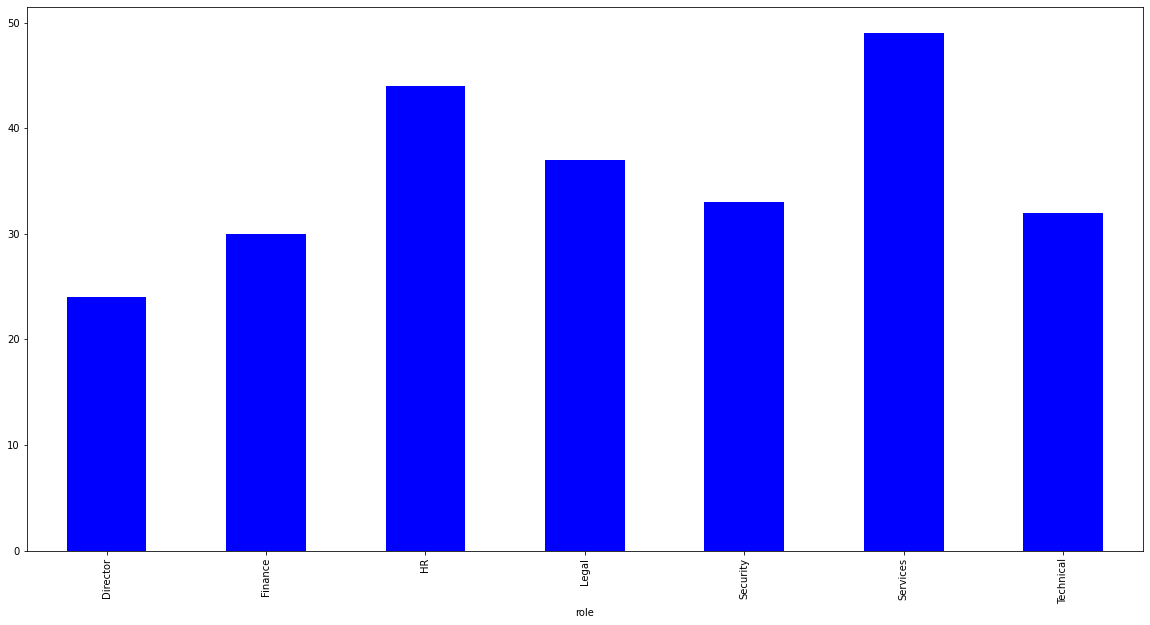

In [7]:
employee_data_copy.groupby('role').count()['user'].plot(kind='bar', figsize=(20, 10), color='blue')


The graph above shows a similar trend between all of the differnet roles. As there are roughly the same amount of people in each role we could assume that each role will roughly perform the same actions in the data that I will be exploring 


# Web data
I will now explore the websites visited per role to see if there are any anomolies between roles

<AxesSubplot:title={'center':'Websites visits per role'}, xlabel='role', ylabel='Number of websites'>

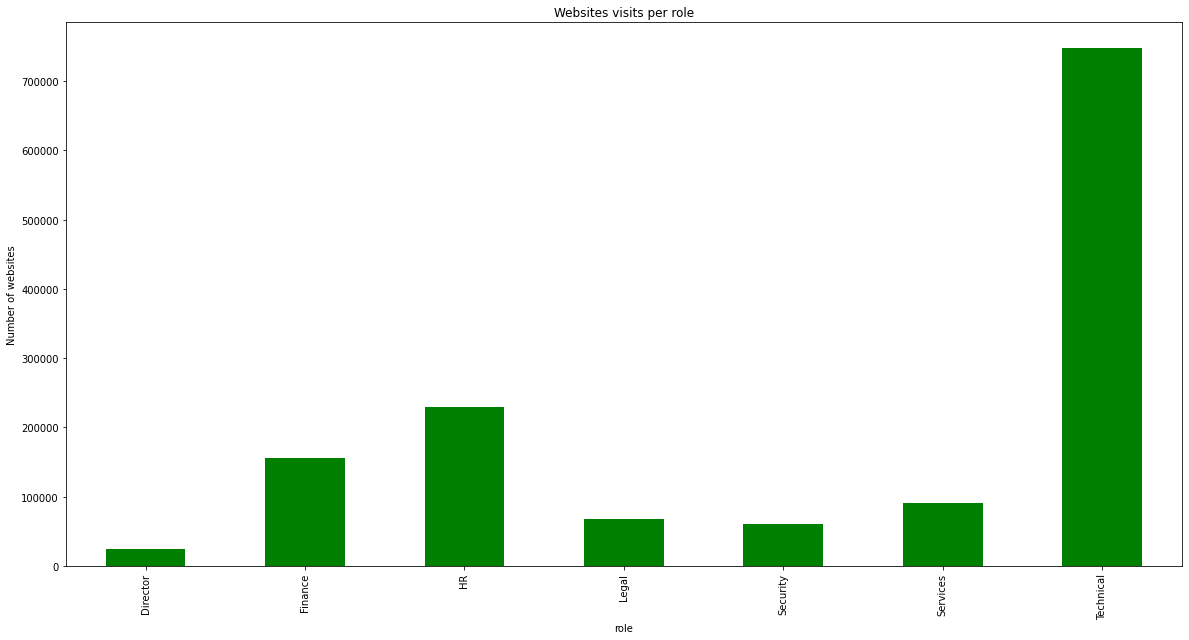

In [8]:
web_data_copy = pd.read_csv('./own_data/' + 'web_data_with_roles.csv')
web_data_copy.groupby('role').count()
# plot web_data_copy grouped by role
fig, ax = plt.subplots(figsize=(20, 10))
ax.title.set_text('Websites visits per role')
ax.set_xlabel('Role')
ax.set_ylabel('Number of websites')
web_data_copy.groupby('role').count()['website'].plot.bar(ax=ax, color='green')


The graph shows the the Technical role visits a lot more websites than any other department. I will have a deeper dive into this role to see if there is anything suspicious. I will now test to see if there are any websites that are accessed more frequently than others.

<AxesSubplot:title={'center':'Websites visits per website'}, xlabel='website', ylabel='Number of websites'>

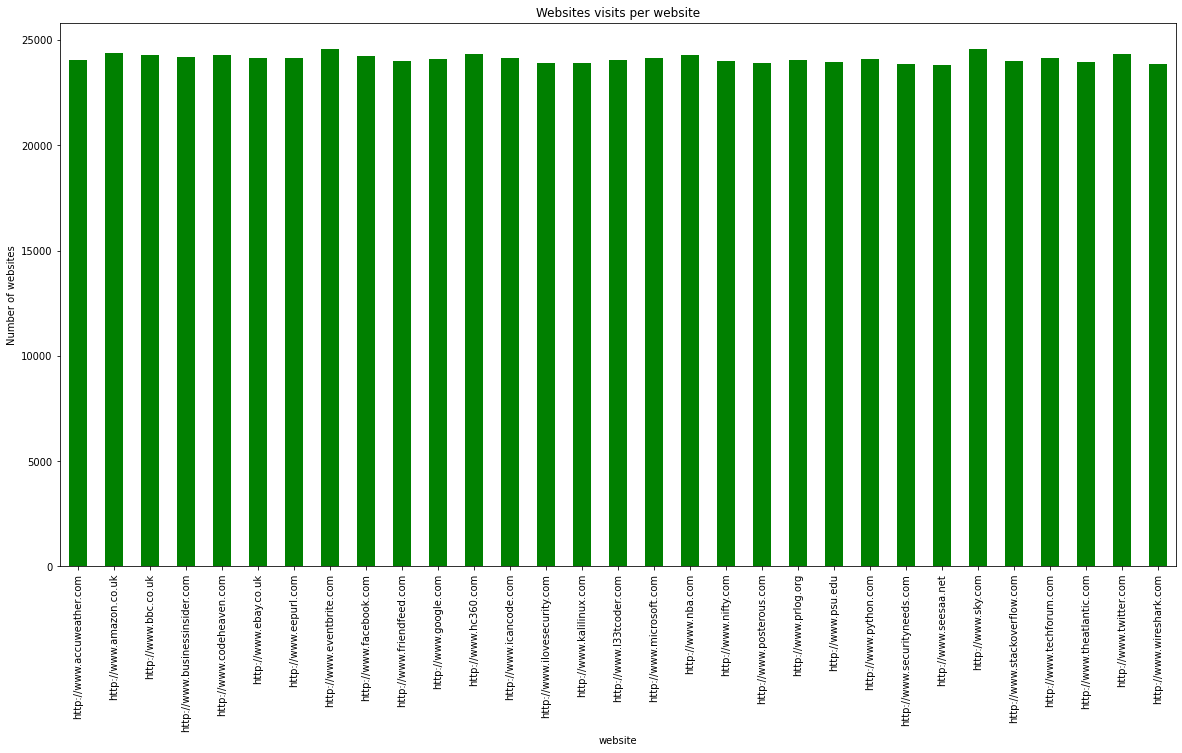

In [9]:
# plot web_data_copy grouped by website
tech_web = web_data_copy[web_data_copy['role'] == 'Technical']

fig, ax = plt.subplots(figsize=(20, 10))
ax.title.set_text('Websites visits per website')
ax.set_xlabel('Website')
ax.set_ylabel('Number of websites')
tech_web.groupby('website').count()['role'].plot.bar(ax=ax, color='green')


The graph above shows a trend between all of the websites visited I will now check to make sure that all of the users have a similar amount of visits just to make sure that there are no anololies there.

<AxesSubplot:xlabel='user'>

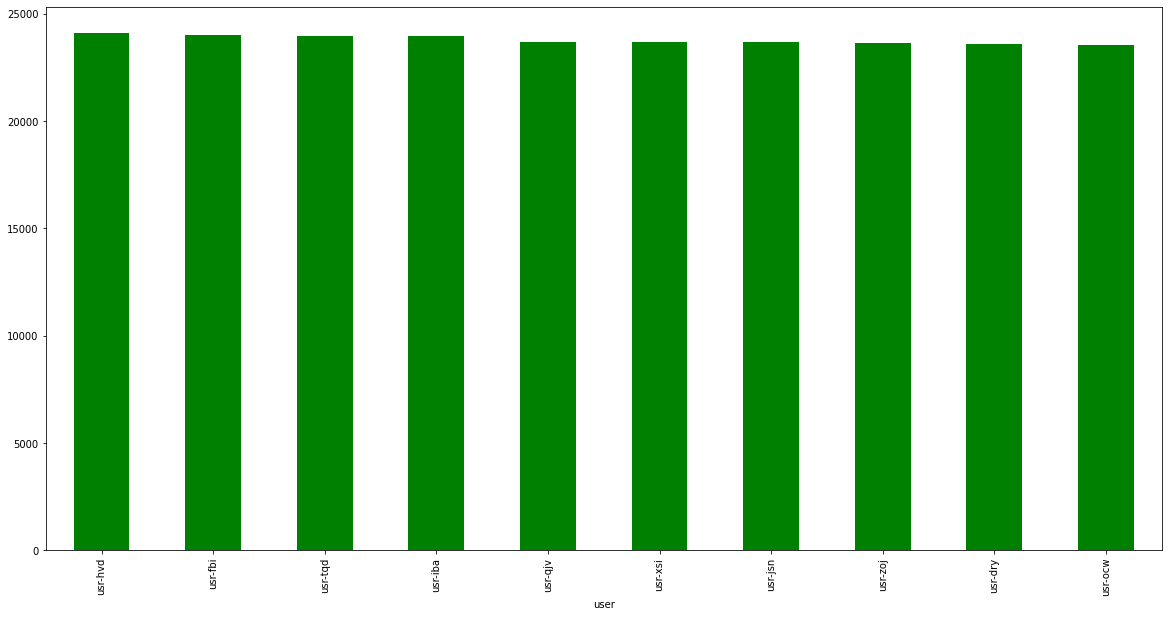

In [10]:
tech_web.groupby('user').count()['website'].sort_values(ascending=False).head(10).plot(kind='bar', figsize=(20, 10), color='green')

The graph above shows that all of the users with the Technical role all visit roughly the same amount of websites as all of the other. As there are no anomolies found within the Technical role I will carry on my investigation into Web traffic

In [11]:
web_data_copy.role.unique()
Security_web = web_data_copy[web_data_copy['role'] == 'Security']
Director_web = web_data_copy[web_data_copy['role'] == 'Director']
Technical_web = web_data_copy[web_data_copy['role'] == 'Technical']
Services_web = web_data_copy[web_data_copy['role'] == 'Services']
Finance_web = web_data_copy[web_data_copy['role'] == 'Finance']
HR_web = web_data_copy[web_data_copy['role'] == 'HR']
Legal_web = web_data_copy[web_data_copy['role'] == 'Legal']


<AxesSubplot:xlabel='website'>

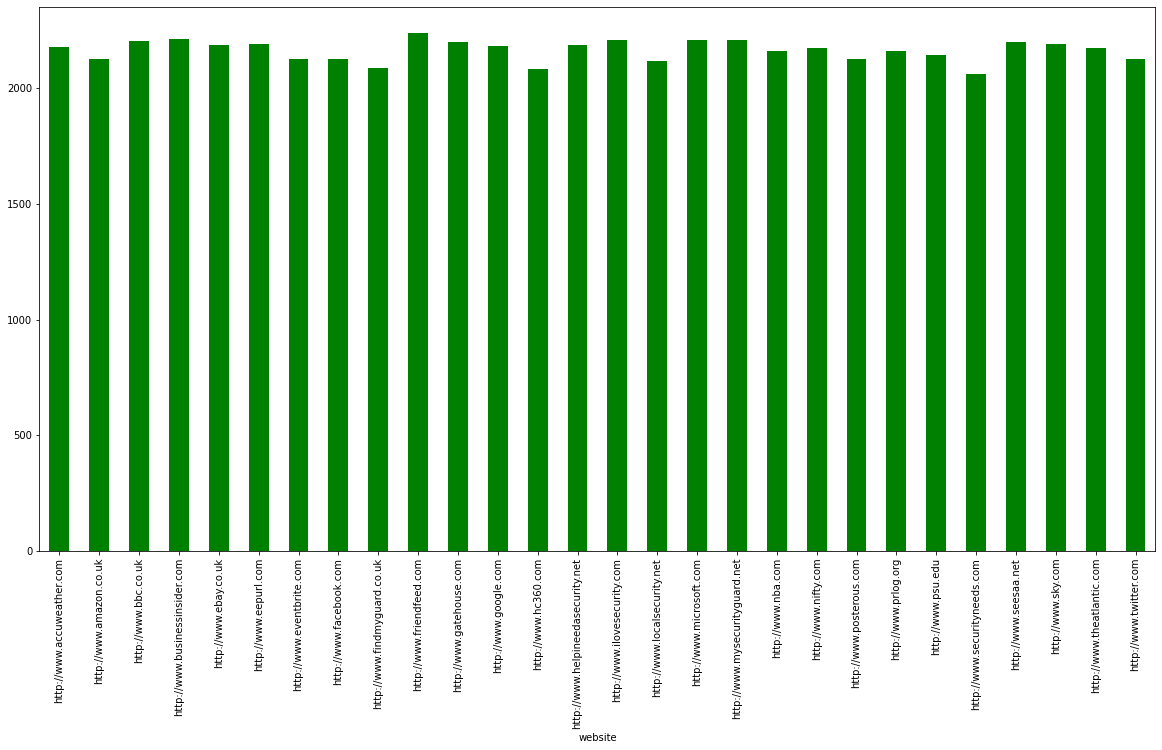

In [12]:
Security_web.groupby('website').count()['role'].plot(kind='bar', figsize=(20, 10), color='green')


No abnormal traffic to any websites

<AxesSubplot:xlabel='website'>

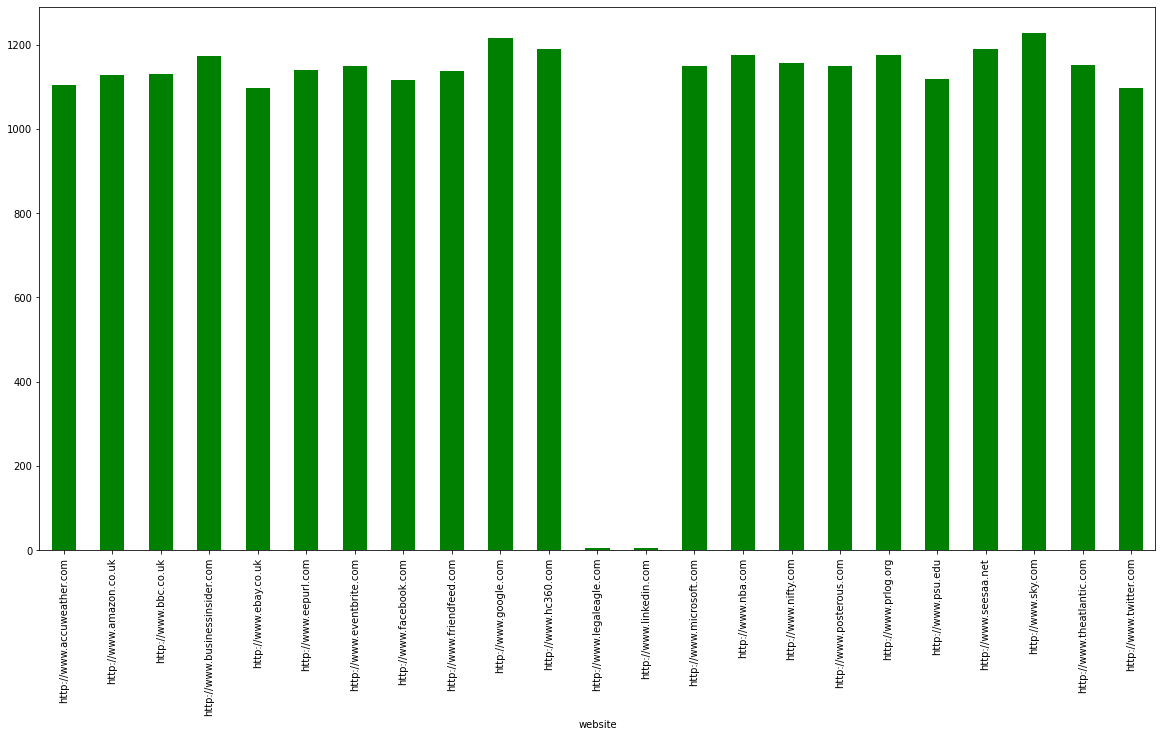

In [13]:
Director_web.groupby('website').count()['role'].plot(kind='bar', figsize=(20, 10), color='green')

There is abnormal activity going to the websites leagaleagle.com and linkedin.com. I will further investigate this

In [14]:
Director_web[(Director_web['website'] == 'http://www.legaleagle.com') | (Director_web['website'] == 'http://www.linkedin.com')]

,Unnamed: 0,datetime,user,website,role
910816,910816,2020-08-10,usr-rhd,http://www.legaleagle.com,Director
910817,910817,2020-08-10,usr-rhd,http://www.legaleagle.com,Director
910839,910839,2020-08-10,usr-rhd,http://www.legaleagle.com,Director
911033,911033,2020-08-10,usr-rhd,http://www.linkedin.com,Director
911042,911042,2020-08-10,usr-rhd,http://www.legaleagle.com,Director
911189,911189,2020-08-10,usr-rhd,http://www.linkedin.com,Director
911748,911748,2020-08-10,usr-rhd,http://www.linkedin.com,Director
912041,912041,2020-08-10,usr-rhd,http://www.legaleagle.com,Director
914816,914816,2020-08-10,usr-rhd,http://www.linkedin.com,Director
914927,914927,2020-08-10,usr-rhd,http://www.linkedin.com,Director


All of the anomalous traffic is coming from one user on the same day. This looks suspicous but there could also be a reason for this not to be such as being asked a one off question on something.

<AxesSubplot:xlabel='website'>

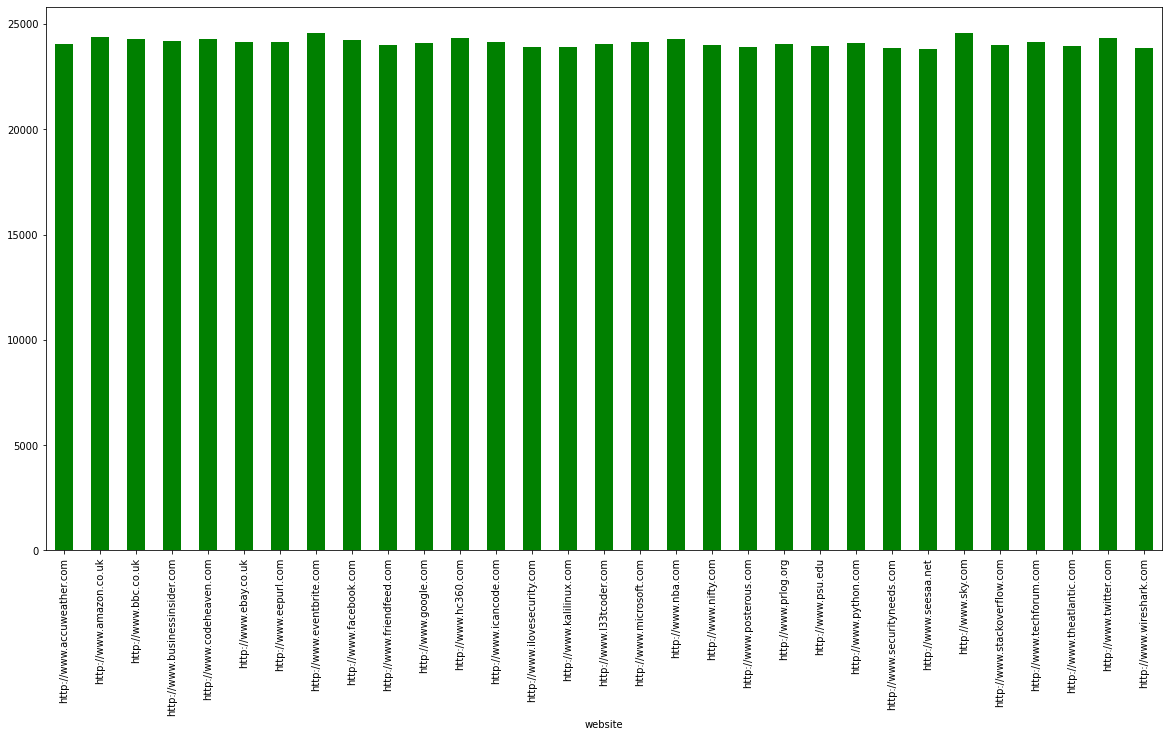

In [15]:
Technical_web.groupby('website').count()['role'].plot(kind='bar', figsize=(20, 10), color='green')

No anomolies were found in the technical web traffic

<AxesSubplot:title={'center':'Legal web traffic'}, xlabel='website', ylabel='Number of websites'>

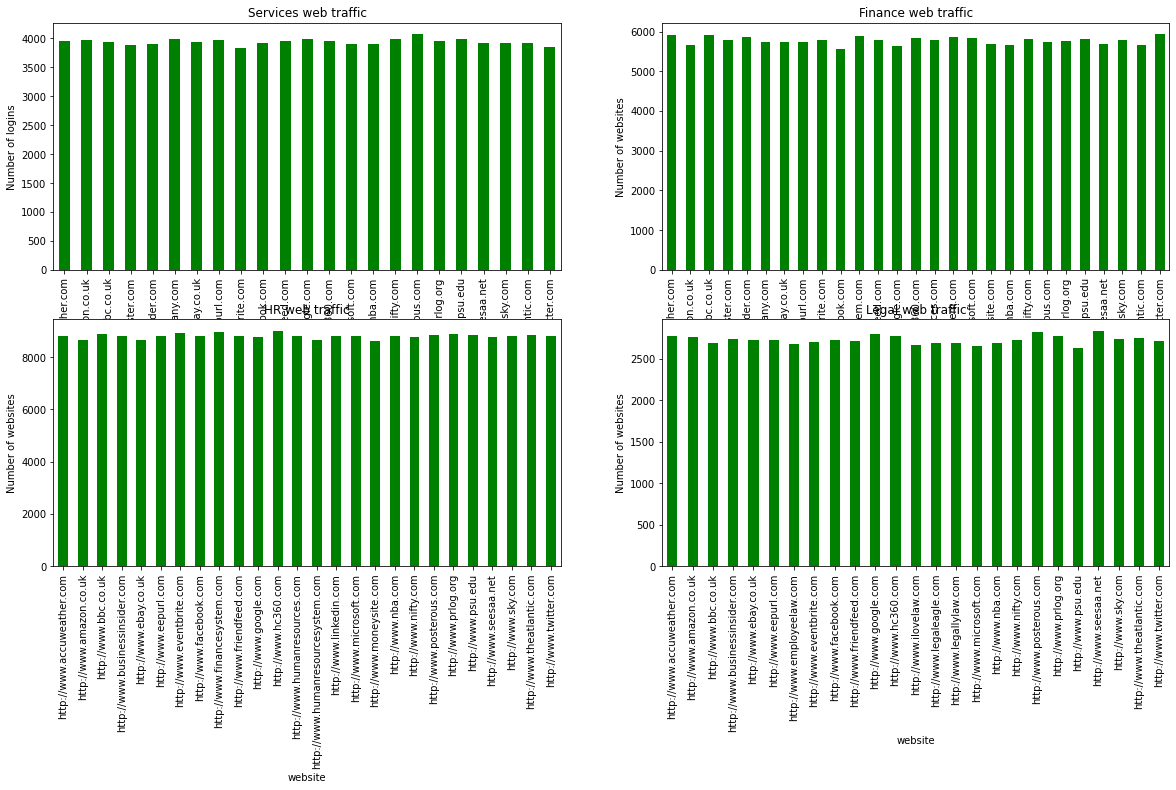

In [16]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 10))
ax1.title.set_text('Services web traffic')
ax1.set_xlabel('Website')
ax1.set_ylabel('Number of logins')

ax2.title.set_text('Finance web traffic')
ax2.set_xlabel('Website')
ax2.set_ylabel('Number of websites')

ax3.title.set_text('HR web traffic')
ax3.set_xlabel('Website')
ax3.set_ylabel('Number of websites')

ax4.title.set_text('Legal web traffic')
ax4.set_xlabel('Website')
ax4.set_ylabel('Number of websites')

Services_web.groupby('website').count()['role'].plot(kind='bar', figsize=(20, 10), color='green', ax=ax1)
Finance_web.groupby('website').count()['role'].plot(kind='bar', figsize=(20, 10), color='green', ax=ax2)
HR_web.groupby('website').count()['role'].plot(kind='bar', figsize=(20, 10), color='green', ax=ax3)
Legal_web.groupby('website').count()['role'].plot(kind='bar', figsize=(20, 10), color='green', ax=ax4)

The above graph shows the websites visited by Services, Finance, HR and Legal. In each graph the website visits were all roughly in the same range and none stood out as anomolous


### Conclusion of Web data
Whilst investigating the web traffic we found anomoulous data within the director role. The user in question is usr-rhd. I will carry on my investigation and see if there is anything else that shows that usr-rhd may be the threat

# File data

<AxesSubplot:title={'center':'Files accessed per hour'}, xlabel='datetime', ylabel='Number of files'>

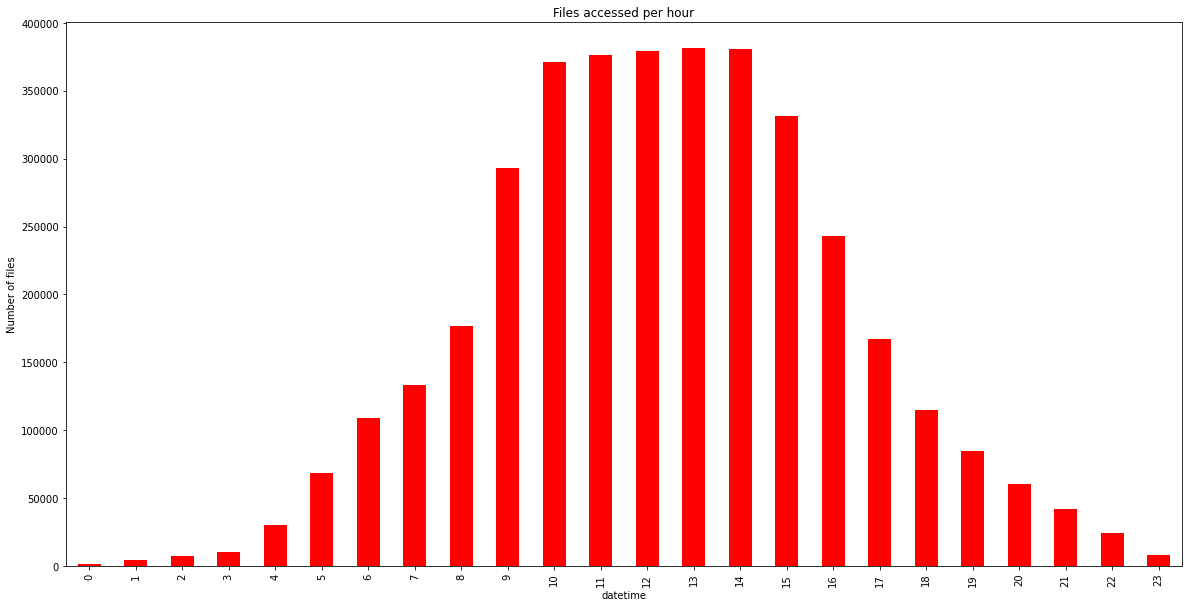

In [17]:
file_data_hours = file_data.copy()
file_data_hours
file_data_hours['datetime'] = file_data_hours['datetime'].dt.hour

# plot file_data_hours grouped by hour
fig, ax = plt.subplots(figsize=(20, 10))
ax.title.set_text('Files accessed per hour')
ax.set_xlabel('Hour')
ax.set_ylabel('Number of files')
file_data_hours.groupby('datetime').count()['user'].plot.bar(ax=ax, color='red')

The graph above shows the usage of files throught each hour. I would of assumed that the staff only work between 9-5 +/- 2 hours but this graph shows otherwise so it may be that they have an out of hours team 

# USB data
I am now going to explore the USB data to see if there are any anomolies in this dataset

           Unnamed: 0  datetime    user  action      pc
role                                                   
Director           16        16      16      16      16
HR              88192     88192   88192   88192   88192
Legal           74194     74194   74194   74194   74194
Services       180270    180270  180270  180270  180270
Technical      118040    118040  118040  118040  118040


<AxesSubplot:title={'center':'USBs per role'}, xlabel='role', ylabel='Number of USBs'>

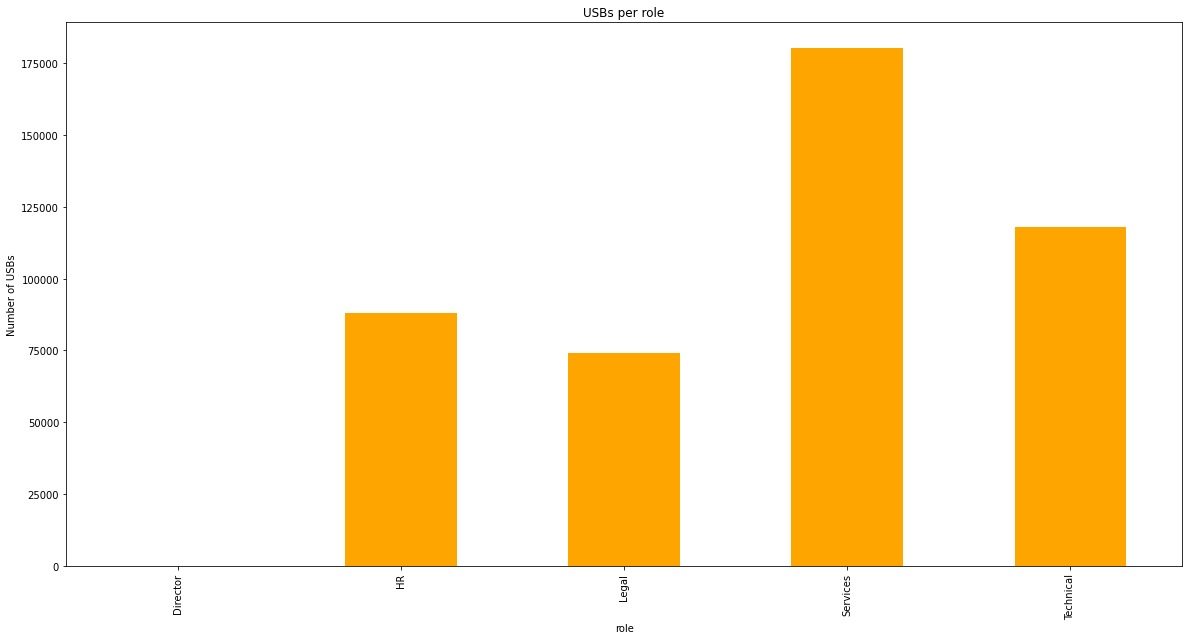

In [18]:
# plot usb_data_copy grouped by role
usb_data_copy = pd.read_csv('./own_data/' + 'usb_data_with_roles.csv')
print(usb_data_copy.groupby('role').count())
fig, ax = plt.subplots(figsize=(20, 10))
ax.title.set_text('USBs per role')
ax.set_xlabel('Role')
ax.set_ylabel('Number of USBs')
usb_data_copy.groupby('role').count()['user'].plot.bar(ax=ax, color='orange')


The graph above shows that the services team uses usb drives a lot throughout the year in comparison to the other departments. Even though you cannot see that the Directors do use usbs on the graph there were 16 uses by directors over the time period. Due to the range of the other departments this is why it looks like the Directors do not use any usbs.

Due to these findings I will now look into both the services department and the directors as they both have uses that do not conform with the other roles usage.

## Services

<AxesSubplot:xlabel='user'>

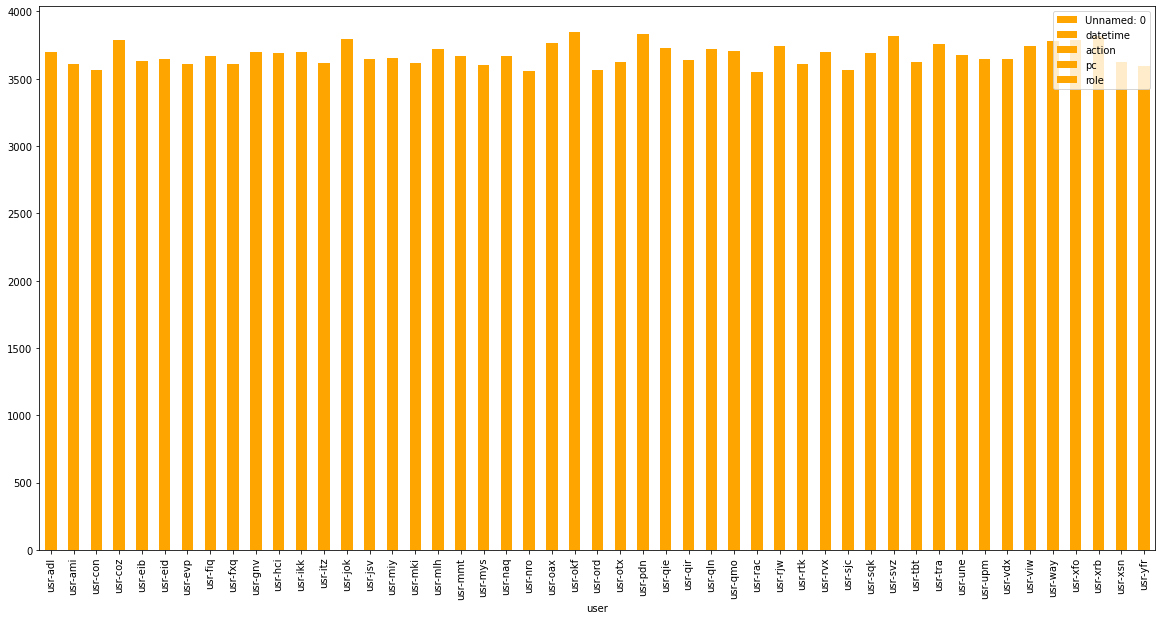

In [19]:
usb_data_services = usb_data_copy[usb_data_copy['role'] == 'Services']
usb_data_services.groupby('user').count().plot(kind='bar', figsize=(20, 10), color='orange')

<AxesSubplot:xlabel='datetime'>

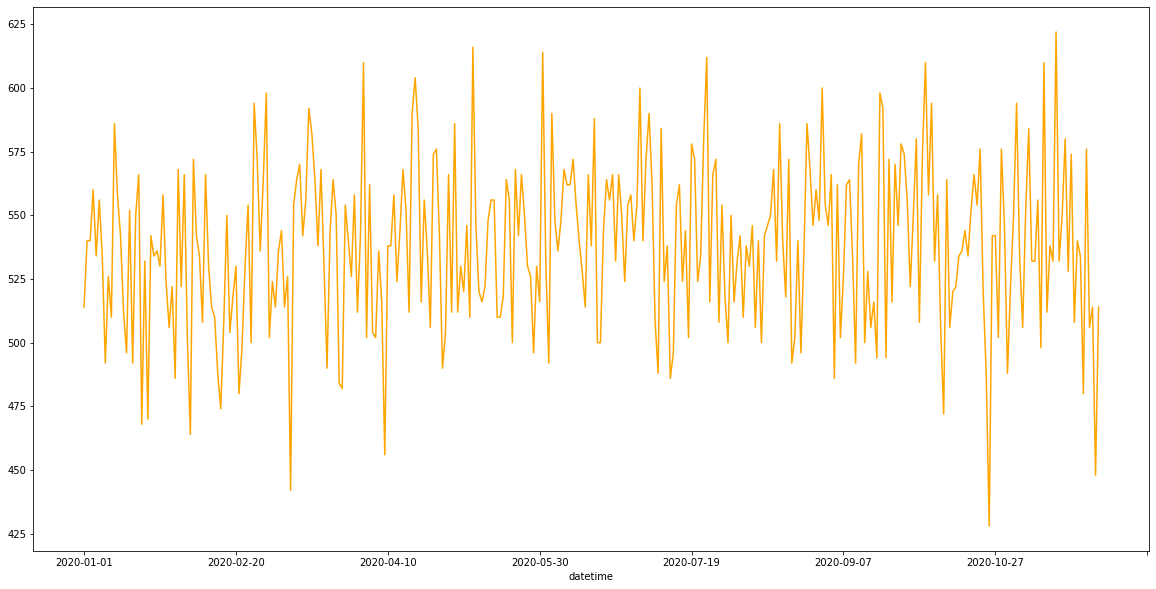

In [20]:
usb_data_services.groupby('datetime').count()['user'].plot(figsize=(20, 10), color='orange')

The two graphs above analyse the use of usbs within the services department.
- The first graph shows that all of the users use usbs a similar amount of times as each other throughout the time period.
- The second graph shows overall usage of usbs to try to see if there we any days with exessive usage of usbs. Although there are some spikes these all fall within about 10% - 20% of the normal usage. Due to this I would not classify this as suspicious. 

## Directors
Now that I have analysed the Services use of usb drives and concluded that there were no suspicious activity I will now analyse the usb usage of the directors.

In [21]:
usb_data_with_roles = pd.read_csv("./own_data/usb_data_with_roles.csv")
director_usb = usb_data_with_roles[usb_data_with_roles['role'] == 'Director']

<AxesSubplot:xlabel='user'>

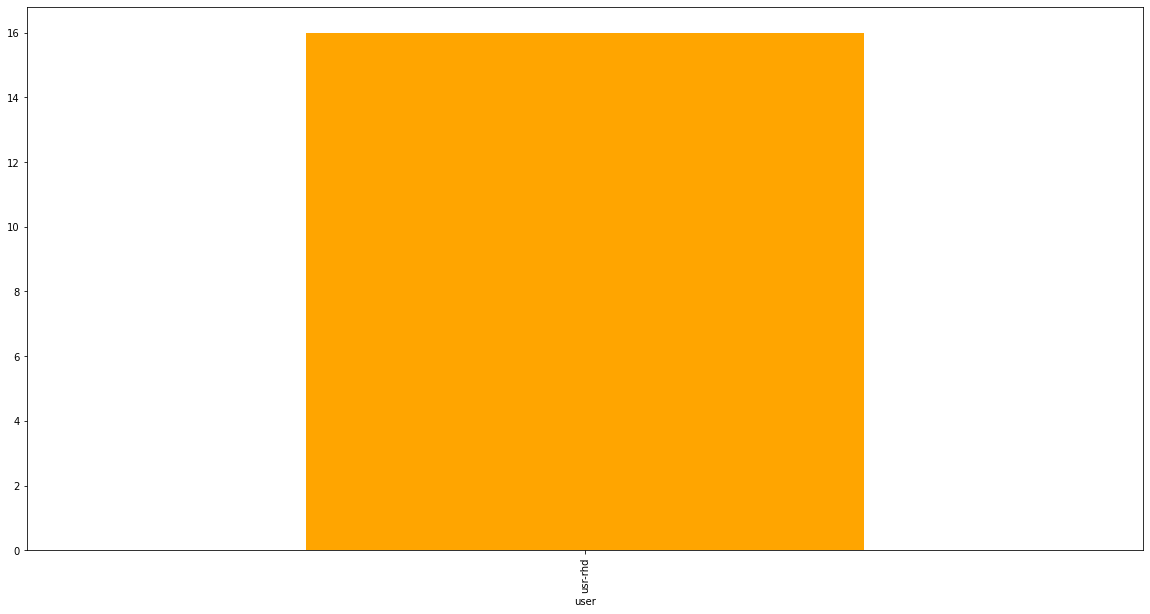

In [22]:

director_usb.groupby('user').count()['action'].plot(kind='bar', figsize=(20, 10), color='orange')

The graph above shows that there was only one director that used a usb drive which was usr-rhd

In [23]:
print(director_usb)
print(director_usb.pc.unique())
print(director_usb.datetime.unique())


        Unnamed: 0    datetime     user      action     pc      role
302102      302102  2020-08-07  usr-rhd  usb_insert  pc248  Director
302248      302248  2020-08-07  usr-rhd  usb_remove  pc248  Director
302412      302412  2020-08-07  usr-rhd  usb_insert  pc248  Director
302508      302508  2020-08-07  usr-rhd  usb_remove  pc248  Director
302613      302613  2020-08-07  usr-rhd  usb_insert  pc248  Director
302619      302619  2020-08-07  usr-rhd  usb_insert  pc248  Director
302623      302623  2020-08-07  usr-rhd  usb_remove  pc248  Director
302628      302628  2020-08-07  usr-rhd  usb_remove  pc248  Director
302633      302633  2020-08-07  usr-rhd  usb_insert  pc248  Director
302637      302637  2020-08-07  usr-rhd  usb_remove  pc248  Director
302643      302643  2020-08-07  usr-rhd  usb_insert  pc248  Director
302649      302649  2020-08-07  usr-rhd  usb_remove  pc248  Director
305558      305558  2020-08-10  usr-rhd  usb_insert  pc248  Director
305570      305570  2020-08-10  us

By looking at the dataframe of the directors usage, it shows that they only used the usbs on two days.
- 2020-08-07
- 2020-08-10

The usbs were also only used on one pc 
- pc248


I will now check to see if the pc that the director is using is the pc that he has been allocated in the employee data file

In [24]:
employee_data[employee_data['user'] == 'usr-rhd']

,user,role,email,pc
152,usr-rhd,Director,usr-rhd@onlinebargains.com,pc152


In [25]:
employee_data[employee_data['pc'] == 'pc248']

,user,role,email,pc
248,usr-eie,Finance,usr-eie@onlinebargains.com,pc248


As you can see the assigned pc for the director is <b>pc152</b> which is different to the pc that the director was using the usb device on which was <b>pc248</b>. This pc is actually usr-eie from the finance department. There could be a logical explanation such as the directors pc was not working for those days but this does seem suspicious. 

This could also mean that usr-eie is also suspicious 

As we have seen that the Director has accessed another computer that is not his own I will check all of his log ins through the time period

In [26]:
login_data_copy = pd.read_csv('./T3_data/' + DATASET + '/login_data.csv', parse_dates=True, index_col=0)
print(f"User usr-rhd only logs into these computers: {login_data_copy[login_data_copy['user'] == 'usr-rhd'].pc.unique()}")
print(f"The only usrs to log into the computer pc248 are : {login_data_copy[login_data_copy['pc'] == 'pc248'].user.unique()}")

User usr-rhd only logs into these computers: ['pc152']
The only usrs to log into the computer pc248 are : ['usr-eie']


When looking at the login data it appears that usr-rhd has only logged into his own computer and not pc258 which he is said to in the usb data. Usr-rhd may of found a way to log in to the computer without the system logging that he has or there may be data missing.

## File data accessed by usr-rhd
I will now investigate the files accessed by usr-rhd on 2020-08-07 and 2020-08-1 as these were the days that the usb drives were used 

In [27]:
files = pd.read_csv('./T3_data/' + DATASET + '/file_data.csv', parse_dates=True, index_col=0)
rhdFiles = files[files['user'] == 'usr-rhd']


### 2020-08-07


Getting the times of day where the usb was used

In [28]:
rhdUSB = pd.read_csv('./T3_data/' + DATASET + '/usb_data.csv', parse_dates=True, index_col=0)
rhdUSB = rhdUSB[rhdUSB['user'] == 'usr-rhd']
# print(rhdUSB)
usbTimes = rhdUSB.datetime.unique()
print(usbTimes)

['2020-08-07 13:59:39.095515' '2020-08-07 14:58:32.019707'
 '2020-08-07 16:12:32.850255' '2020-08-07 17:10:00.669627'
 '2020-08-07 19:19:47.099527' '2020-08-07 19:31:43.307955'
 '2020-08-07 19:39:24.596043' '2020-08-07 19:47:37.555743'
 '2020-08-07 20:10:14.118667' '2020-08-07 20:37:30.891533'
 '2020-08-07 21:14:27.154679' '2020-08-07 21:57:18.888606'
 '2020-08-10 08:37:29.217978' '2020-08-10 08:49:16.531297'
 '2020-08-10 16:17:03.267001' '2020-08-10 16:21:13.621977']


In [29]:
usbTimes08_07 = [
['2020-08-07 13:59:39.095515', '2020-08-07 14:58:32.019707'],
['2020-08-07 16:12:32.850255', '2020-08-07 17:10:00.669627'],
['2020-08-07 19:19:47.099527', '2020-08-07 19:31:43.307955'],
['2020-08-07 19:39:24.596043', '2020-08-07 19:47:37.555743'],
['2020-08-07 20:10:14.118667', '2020-08-07 20:37:30.891533'],
['2020-08-07 21:14:27.154679', '2020-08-07 21:57:18.888606'],
]

usbTimes08_10 = [
['2020-08-10 08:37:29.217978', '2020-08-10 08:49:16.531297'],
['2020-08-10 16:17:03.267001', '2020-08-10 16:21:13.621977']
]

In [30]:
files = pd.read_csv('./T3_data/' + DATASET + '/file_data.csv', parse_dates=True, index_col=0)

<AxesSubplot:xlabel='filename'>

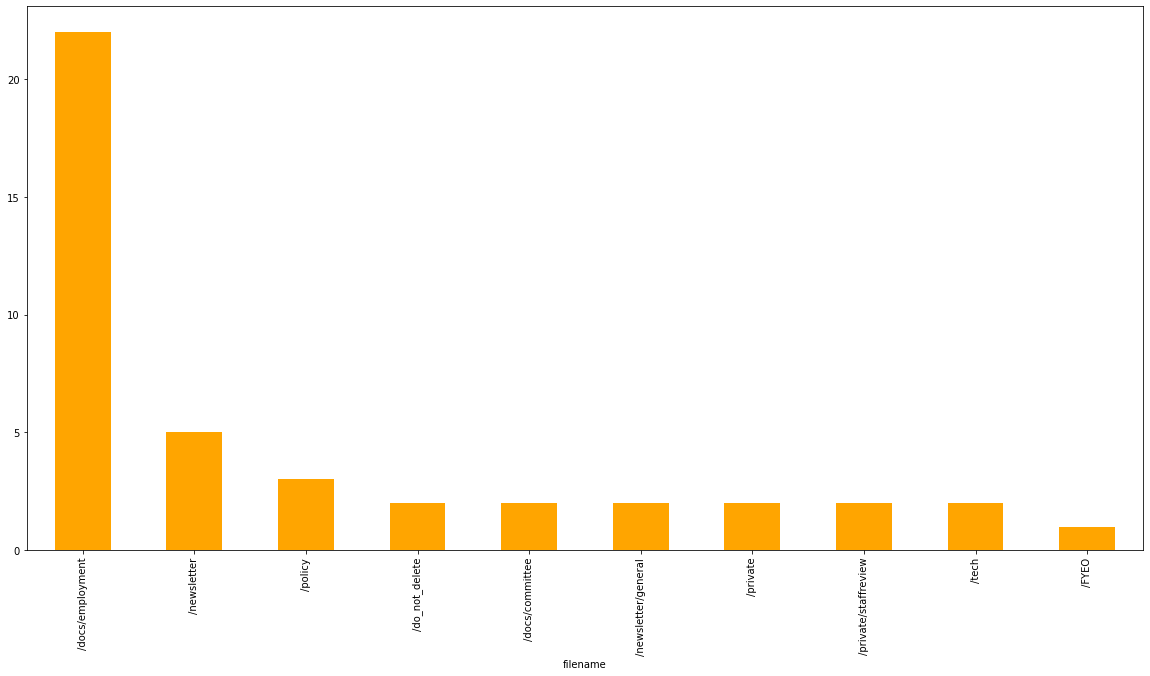

In [31]:
# List files accessed on usbTimes08_07
rhdFiles08_07 = files[files['user'] == 'usr-rhd']
rhdFiles08_07 = rhdFiles[
    ((rhdFiles['datetime'] >= usbTimes08_07[0][0]) & (rhdFiles['datetime'] <= usbTimes08_07[0][1])) |
    ((rhdFiles['datetime'] >= usbTimes08_07[1][0]) & (rhdFiles['datetime'] <= usbTimes08_07[1][1])) |
    ((rhdFiles['datetime'] >= usbTimes08_07[2][0]) & (rhdFiles['datetime'] <= usbTimes08_07[2][1])) |
    ((rhdFiles['datetime'] >= usbTimes08_07[3][0]) & (rhdFiles['datetime'] <= usbTimes08_07[3][1])) |
    ((rhdFiles['datetime'] >= usbTimes08_07[4][0]) & (rhdFiles['datetime'] <= usbTimes08_07[4][1])) |
    ((rhdFiles['datetime'] >= usbTimes08_07[5][0]) & (rhdFiles['datetime'] <= usbTimes08_07[5][1]))
]
rhdFiles08_07.groupby('filename').count()['user'].sort_values(ascending=False).head(10).plot(kind='bar', figsize=(20, 10), color='orange')


On this day the director is accessing employment files a lot more than any other file. As all of these files have been accessed in the same timeframe that the usb was connected any of these files may of been comprimised

### 2020-08-10

<AxesSubplot:xlabel='filename'>

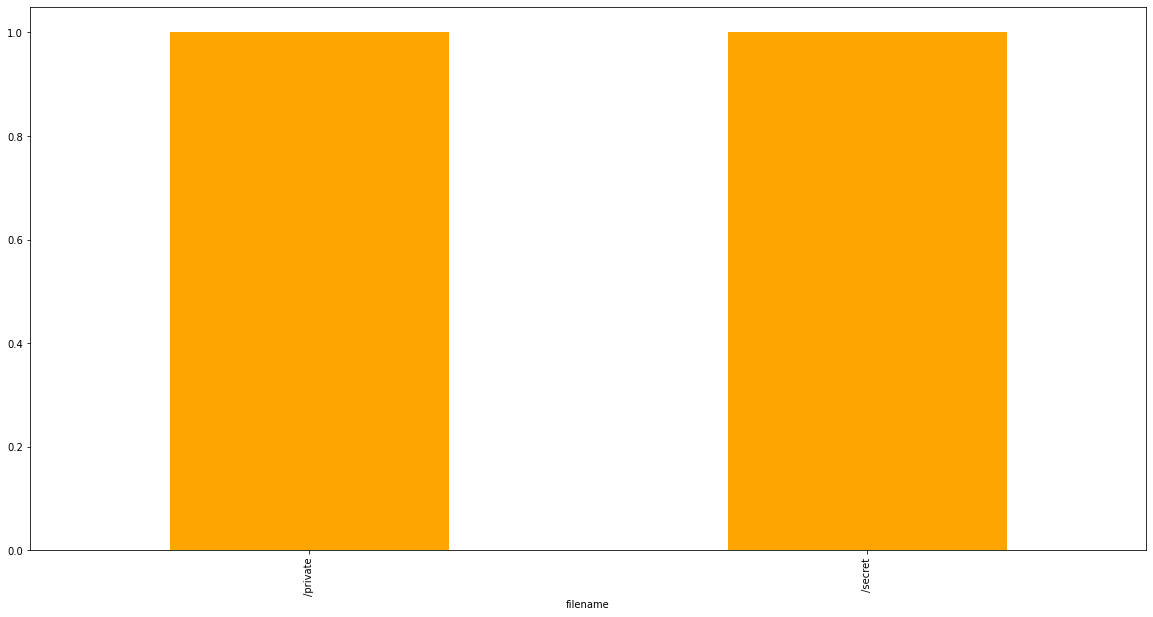

In [32]:
rhdFiles08_10 = files[files['user'] == 'usr-rhd']

rhdFiles08_10 = rhdFiles08_10[
    ((rhdFiles08_10['datetime'] >= usbTimes08_10[0][0]) & (rhdFiles08_10['datetime'] <= usbTimes08_10[0][1])) |
    ((rhdFiles08_10['datetime'] >= usbTimes08_10[1][0]) & (rhdFiles08_10['datetime'] <= usbTimes08_10[1][1]))
]
rhdFiles08_10.groupby('filename').count()['user'].sort_values(ascending=False).head(10).plot(kind='bar', figsize=(20, 10), color='orange')

During the times that the usb is connected to the pc on 2020-08-10 both of these files were accessed. This is very suspicous as they are accessing a private and secret file and most likely transferring it onto the usb 

# Email data

In [33]:
email_data_with_roles = pd.read_csv("./own_data/email_data_with_roles.csv")


<AxesSubplot:xlabel='role'>

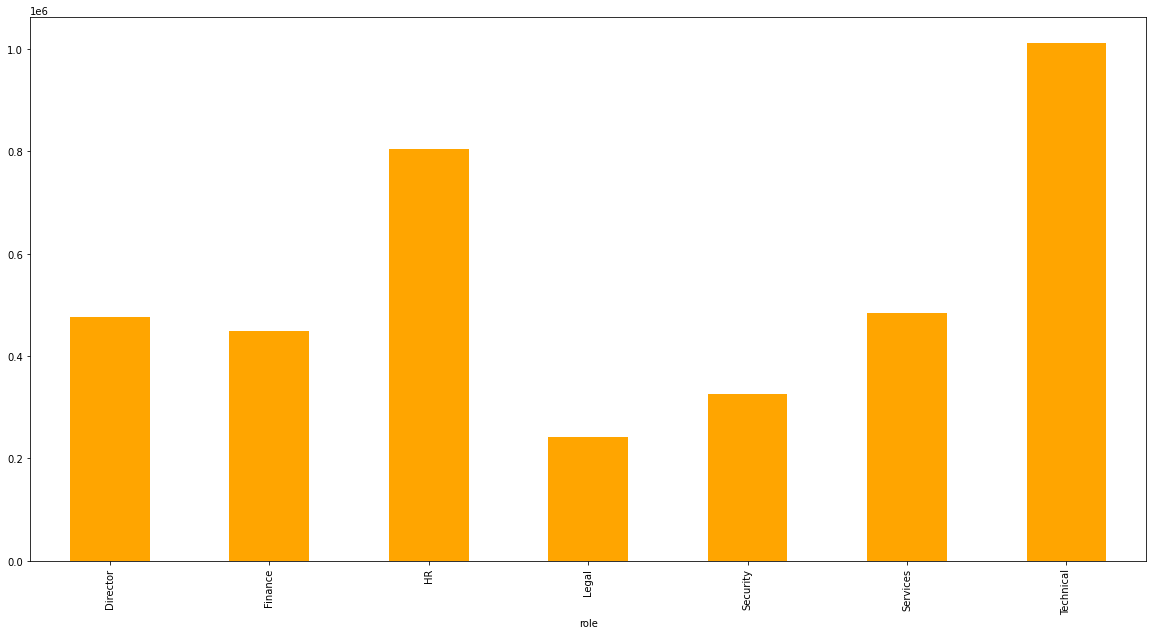

In [34]:
email_data_with_roles
email_data_with_roles.groupby('role').count()['username'].plot(kind='bar', figsize=(20, 10), color='orange')

The graph above shows the emails sent per department. As there is a large range of emails send between the different departments I will do a deeper dive into each department

<AxesSubplot:xlabel='username'>

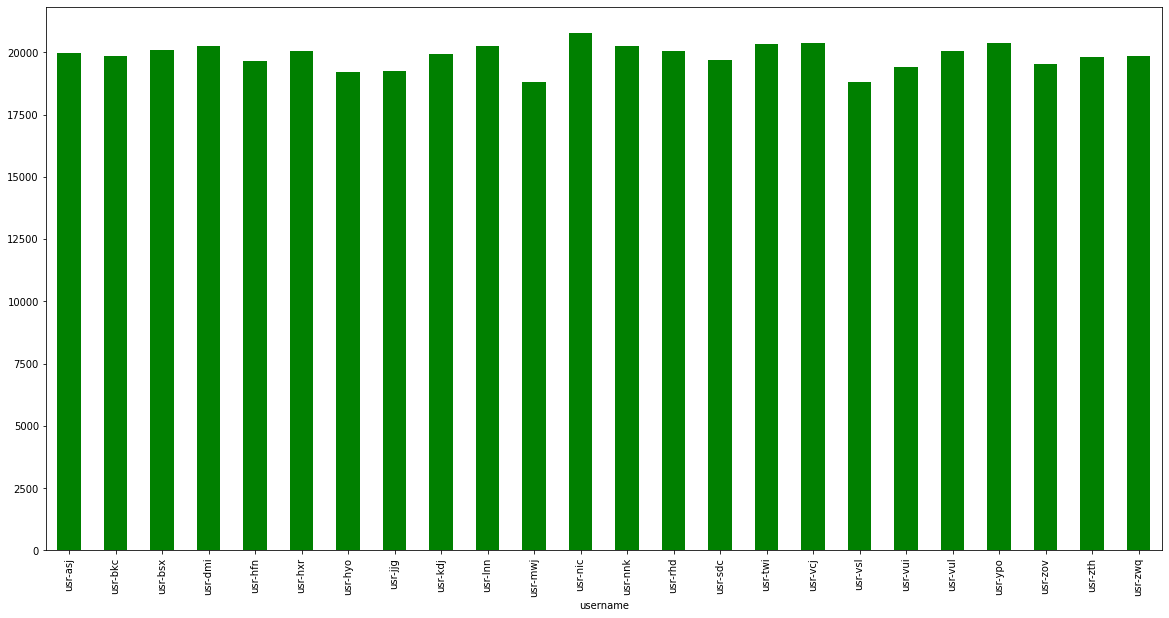

In [35]:
Director_email = email_data_with_roles[email_data_with_roles['role'] == 'Director']

Director_email.groupby('username').count()['recipient'].plot(kind='bar', figsize=(20, 10), color='green')

The graph above shows that all of the directors send roughly the same amount of emails as each other

<AxesSubplot:xlabel='username'>

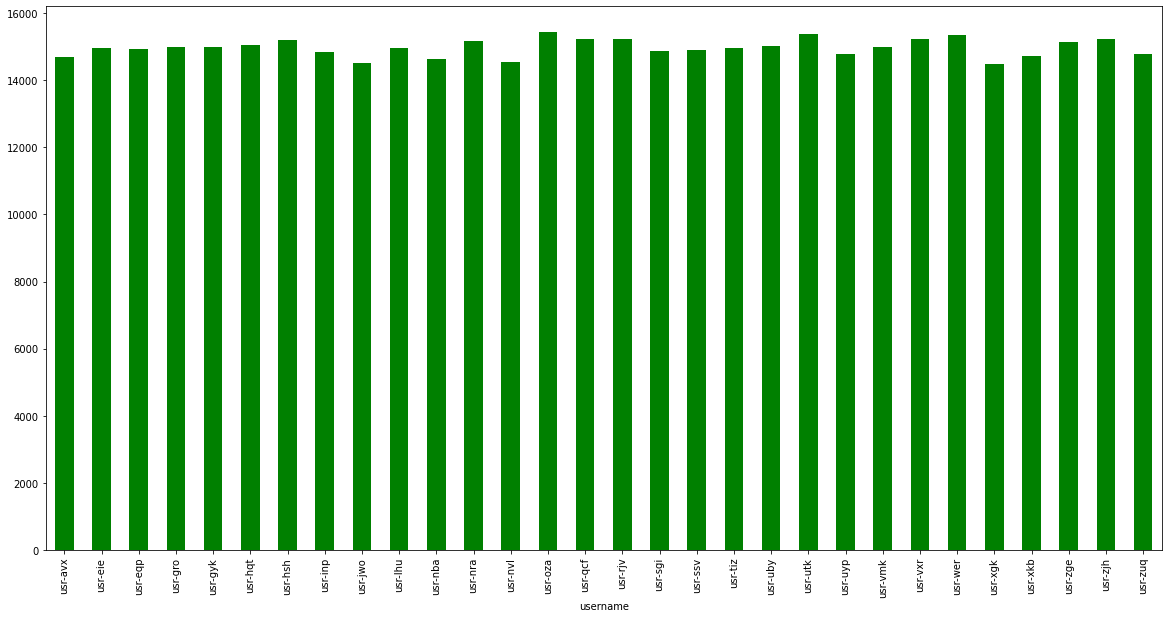

In [36]:
Finance_email = email_data_with_roles[email_data_with_roles['role'] == 'Finance']
Finance_email.groupby('username').count()['recipient'].plot(kind='bar', figsize=(20, 10), color='green')

The graph above shows that all of the finance department send roughly the same amount of emails as each other

<AxesSubplot:xlabel='username'>

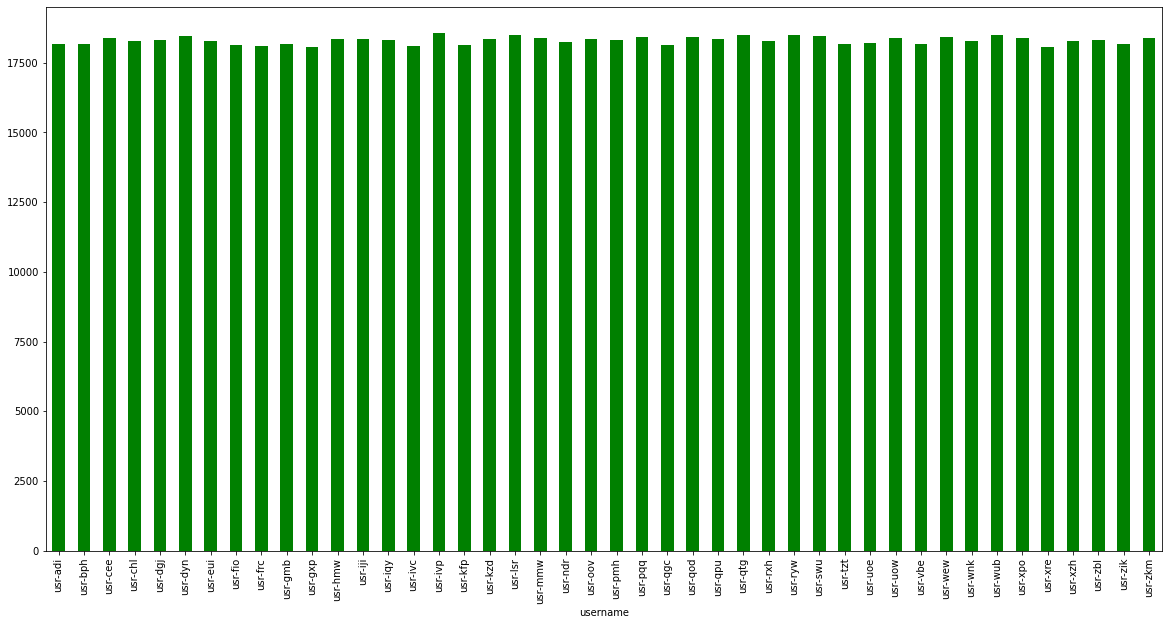

In [37]:
HR_email = email_data_with_roles[email_data_with_roles['role'] == 'HR']
HR_email.groupby('username').count()['recipient'].plot(kind='bar', figsize=(20, 10), color='green')

The graph above shows that all of the HR department send roughly the same amount of emails as each other

<AxesSubplot:xlabel='username'>

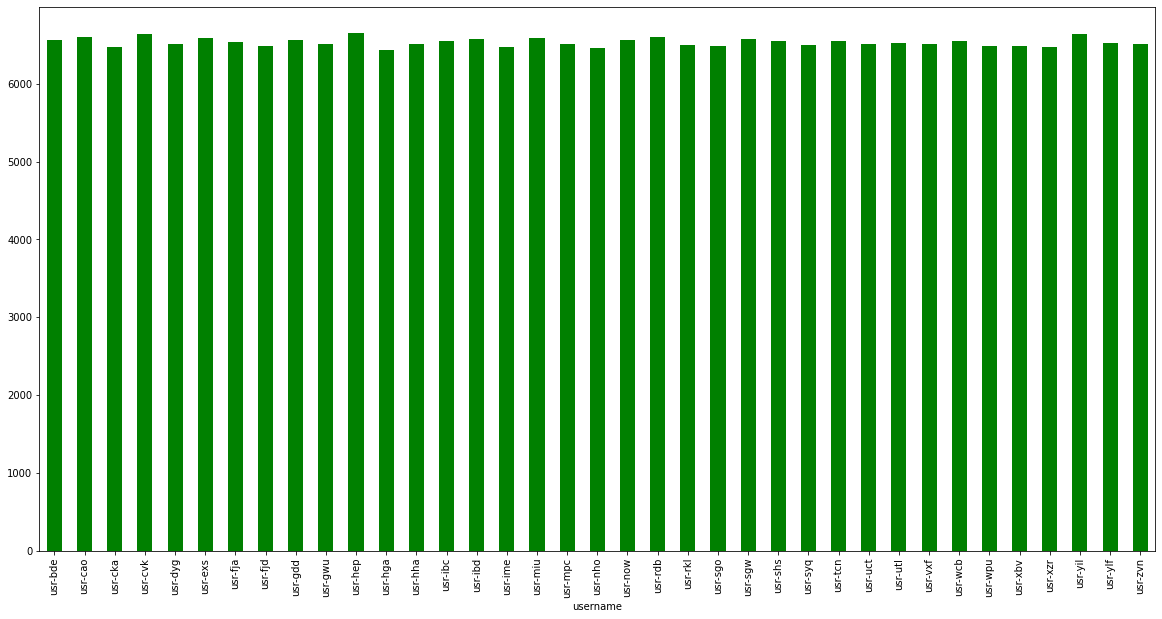

In [38]:
Legal_email = email_data_with_roles[email_data_with_roles['role'] == 'Legal']
Legal_email.groupby('username').count()['recipient'].plot(kind='bar', figsize=(20, 10), color='green')

The graph above shows that all of the Legal department send roughly the same amount of emails as each other

<AxesSubplot:xlabel='username'>

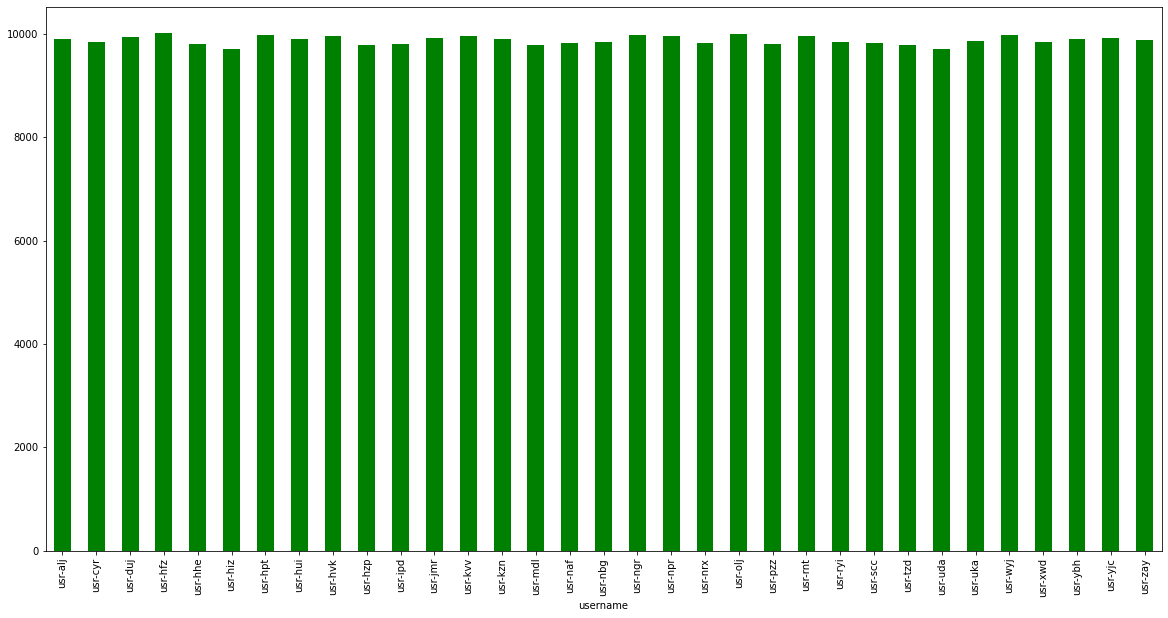

In [39]:
Security_email = email_data_with_roles[email_data_with_roles['role'] == 'Security']
Security_email.groupby('username').count()['recipient'].plot(kind='bar', figsize=(20, 10), color='green')

The graph above shows that all of the Security department send roughly the same amount of emails as each other

<AxesSubplot:xlabel='username'>

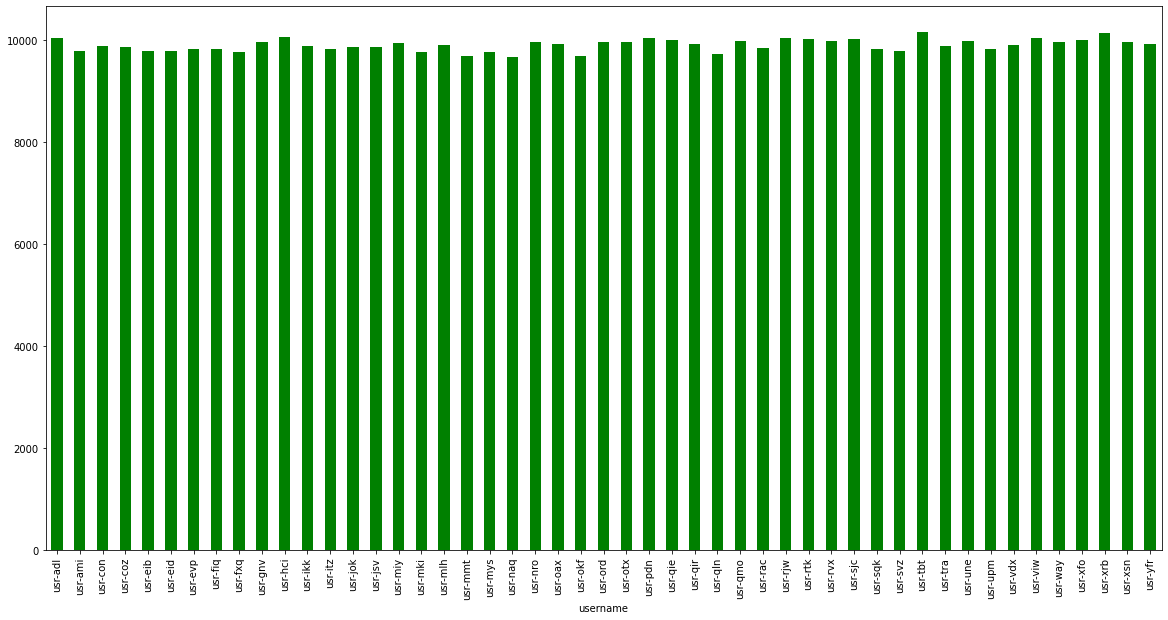

In [40]:
Services_email = email_data_with_roles[email_data_with_roles['role'] == 'Services']
Services_email.groupby('username').count()['recipient'].plot(kind='bar', figsize=(20, 10), color='green')

The graph above shows that all of the Services department send roughly the same amount of emails as each other

<AxesSubplot:xlabel='username'>

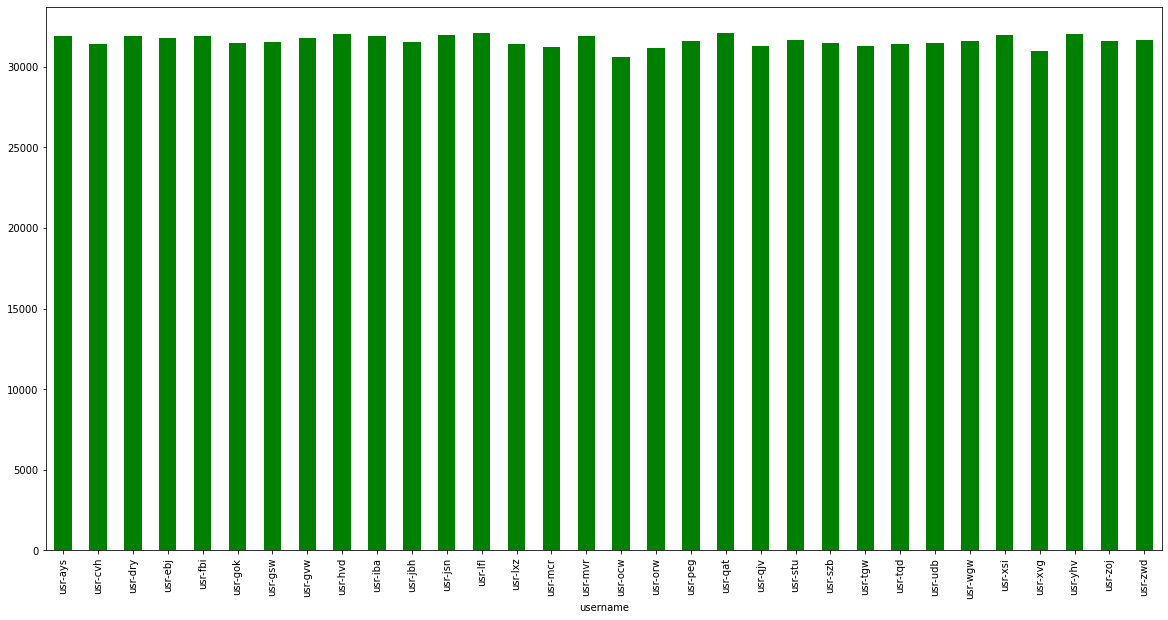

In [41]:
Technical_email = email_data_with_roles[email_data_with_roles['role'] == 'Technical']
Technical_email.groupby('username').count()['recipient'].plot(kind='bar', figsize=(20, 10), color='green')

The graph above shows that all of the Technical department send roughly the same amount of emails as each other

### Email Conclusion
After doing a deeper dive into the email data there are no senders that deviate from the others and all follow the same pattern


<AxesSubplot:xlabel='datetime'>

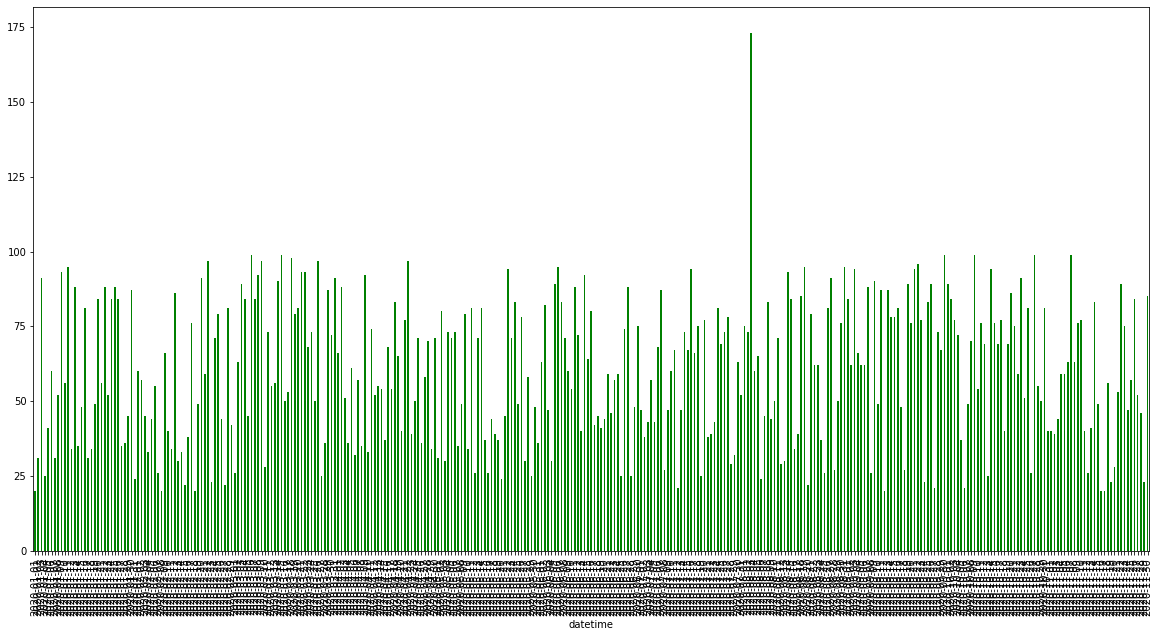

In [42]:
RHD_email = email_data_with_roles[email_data_with_roles['username'] == 'usr-rhd']
RHD_email.groupby('datetime').count()['recipient'].plot(kind='bar', figsize=(20, 10), color='green')

In [43]:
anomoly = RHD_email
anomoly = anomoly.groupby('datetime').count()['recipient']
anomoly = anomoly[anomoly > 100]
anomoly


datetime
2020-08-03    173
Name: recipient, dtype: int64

User RHD sent nearly double the emails on 2020-08-03 than he would usually. This is very close to the day where he suspiciously used the USBs. I will now investigate further to see who he was sending these emails to.

<AxesSubplot:xlabel='recipient'>

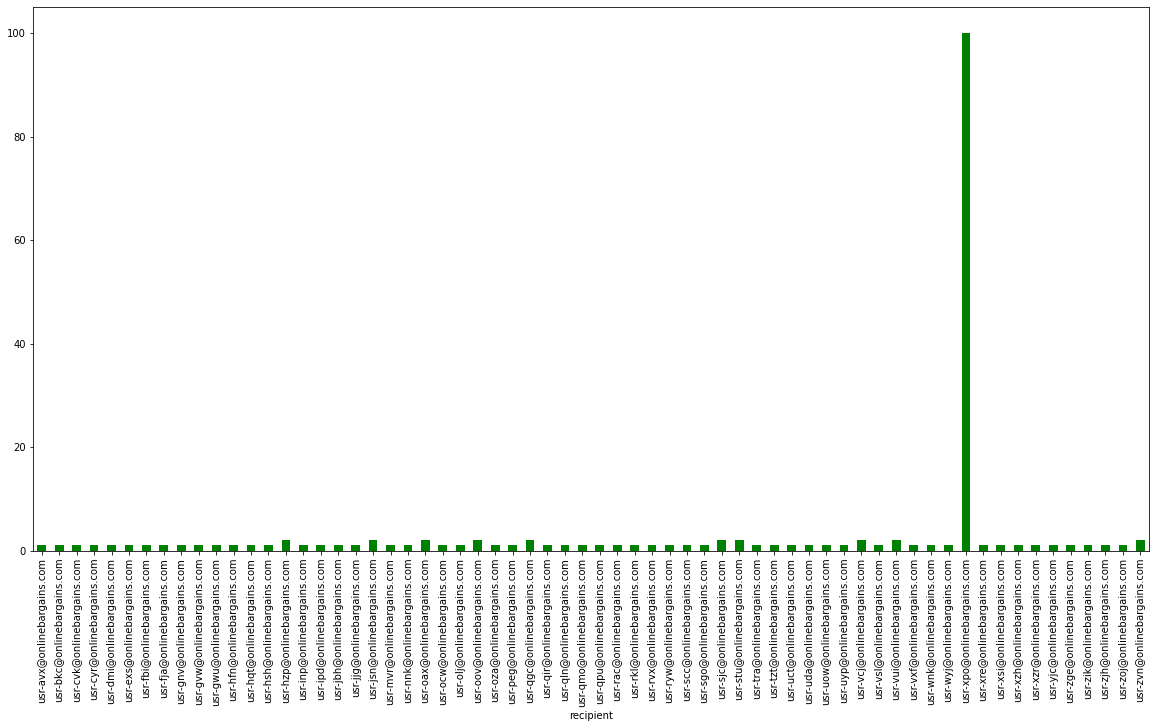

In [44]:
highEmail_RHD = RHD_email[RHD_email['datetime'] == '2020-08-03']
highEmail_RHD.groupby('recipient').count()['username'].plot(kind='bar', figsize=(20, 10), color='green')

AS you can see from the graph above the director rhd sends an excessive amount of emails to the user xpo on 2020-08-3

In [45]:
XPO_employee = employee_data[employee_data['user'] == 'usr-xpo']
XPO_employee

,user,role,email,pc
157,usr-xpo,HR,usr-xpo@onlinebargains.com,pc157


After looking into the user that the suspicious director was emailing it appears that they are from HR. This may be how the director has had access to so many employee records. I then looked back over the data that I have already investigated I have not found any evidence to show that user xpo is suspicious 

# Conclusion - Summary of Findings

I believe that usr-rhd is the threat. <br>
This is due to:
- They are the only director to of used a USB drive.
    - They use the USB drive several times during the days that they do use a USB
    - They only use the USB over a period of two days and then do not use it again for the period of data given

- The director also accesses suspicious files whilst the USB drives are connected such as
    - /private
    - /secret
    - docs/employment
    - /policy
    - /do_not_delete
    - /private/staffreview
    - /FYEO 

     I have assumed that the /FYEO directory stands for "For Your Eyes Only". This could suggest that this is private information on the director or that it is private company data that only the director has access to 

- Usr-rhb is also the only director to visit the websites "legaleagle.com" and "linkedin.com". The website legal eagle could suggest that the director is looking for legal advice on an issue which could show that they are doing something illegal. By visiting linkedin it could also suggest that they are looking at other jobs that may be available or communicating with people from a rival business and sharing information

- The was also excessive amounts of emails sent to one user on the 2020-08-03. As we cannot see what information was exchanged in the emails this may not be relevant in this situation but there is definitely something odd going on.


Overall all of the data points to user rhd as being the threat as there is enough data to show that they are acting differently from all of the other directors.